## <center> Income Prediction Project

Unique values of features:
- `age`: continuous.
- `workclass`: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- `fnlwgt`: continuous.
- `education`: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- `education.num`: continuous.
- `marital.status`: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- `occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- `relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- `race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- `sex`: Female, Male.
- `capital.gain`: continuous.
- `capital.-loss`: continuous.
- `hours.per.week`: continuous.
- `native.country`: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- `income`: >50K,<=50K

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set()

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC

import warnings
warnings.filterwarnings('ignore')


In [4]:
data = pd.read_csv(r'D:\Mohamed\Mohamed\Faculty\machine learning\projects\special\42-Mohamed Nasr_Income Prediction\Income Prediction Project\data\adult.csv')
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## <center>  Exploratory data analysis with Pandas

**1. How many <=50K and >50K (income feature) are represented in this dataset?**

In [5]:
data['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [6]:
x = round((float((data['income'] == "<=50K").sum())/ data.shape[0]), 2) * 100
print(f"{x} % thier income is <=50K.")

76.0 % thier income is <=50K.


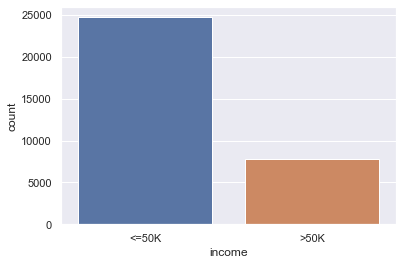

In [7]:
sns.countplot('income', data= data);

**2. How many men and women (*sex* feature) are represented in this dataset?** 

In [8]:
data['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

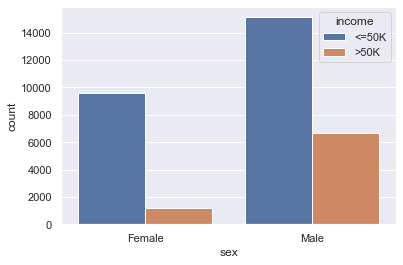

In [9]:
sns.countplot('sex', hue='income', data=data);

**3. What is the average age (*age* feature) of women?**

In [10]:
data.loc[data['sex'] == 'Female', 'age'].mean()

36.85823043357163

**4. What are mean value and standard deviation of the age of those who recieve more than 50K per year (*income* feature) and those who receive less than 50K per year?**

In [11]:
ages1 = data.loc[data['income'] == '>50K', 'age']
ages2 = data.loc[data['income'] == '<=50K', 'age']
print("The average age of the rich: {0} +- {1} years, poor: {2} +- {3} years.".format(
    round(ages1.mean()), round(ages1.std(), 1),
    round(ages2.mean()), round(ages2.std(), 1)))

The average age of the rich: 44 +- 10.5 years, poor: 37 +- 14.0 years.


**5. Is it true that people who receive more than 50k have at least high school education? (*education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* or *Doctorate* feature)**

In [12]:
data.loc[data['income'] == '>50K', 'education'].unique() # No

array(['Doctorate', 'Some-college', 'Prof-school', 'Bachelors', 'Masters',
       '11th', 'Assoc-acdm', '10th', 'HS-grad', 'Assoc-voc', '9th',
       '7th-8th', '5th-6th', '12th', '1st-4th'], dtype=object)

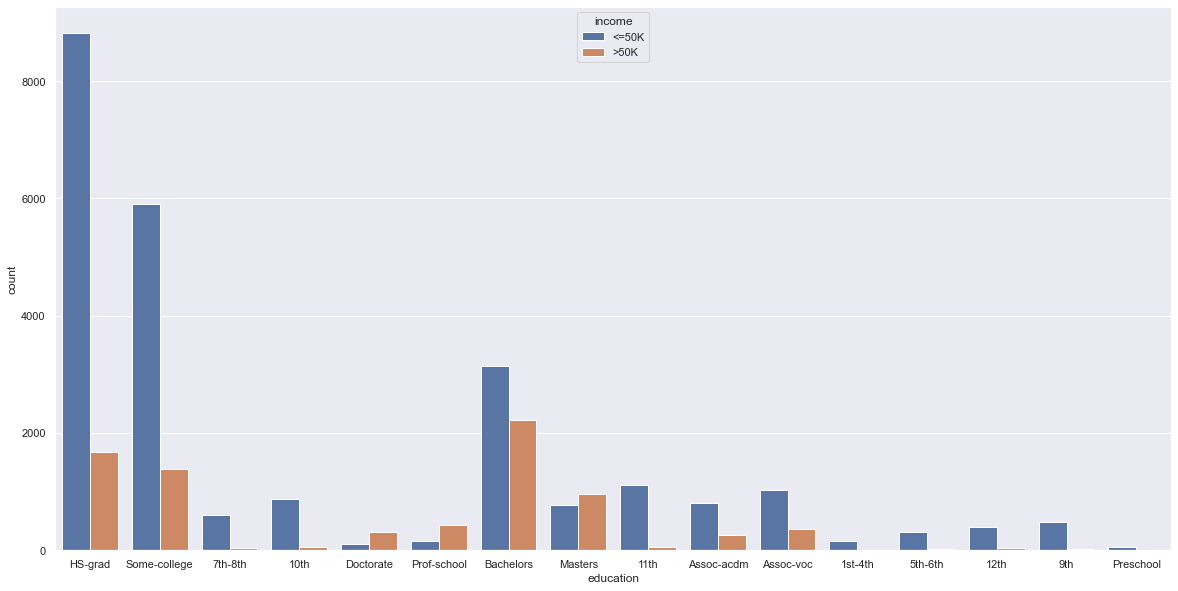

In [13]:
plt.figure(figsize = (20,10))
sns.countplot('education', hue='income', data=data);

**No**

**6. Display statistics of age for each race (*race* feature) and each gender.** 

In [14]:
for (race, sex), sub_df in data.groupby(['race', 'sex']):
    print("Race: {0}, sex: {1}".format(race, sex))
    print(sub_df['age'].describe())

Race: Amer-Indian-Eskimo, sex: Female
count    119.000000
mean      37.117647
std       13.114991
min       17.000000
25%       27.000000
50%       36.000000
75%       46.000000
max       80.000000
Name: age, dtype: float64
Race: Amer-Indian-Eskimo, sex: Male
count    192.000000
mean      37.208333
std       12.049563
min       17.000000
25%       28.000000
50%       35.000000
75%       45.000000
max       82.000000
Name: age, dtype: float64
Race: Asian-Pac-Islander, sex: Female
count    346.000000
mean      35.089595
std       12.300845
min       17.000000
25%       25.000000
50%       33.000000
75%       43.750000
max       75.000000
Name: age, dtype: float64
Race: Asian-Pac-Islander, sex: Male
count    693.000000
mean      39.073593
std       12.883944
min       18.000000
25%       29.000000
50%       37.000000
75%       46.000000
max       90.000000
Name: age, dtype: float64
Race: Black, sex: Female
count    1555.000000
mean       37.854019
std        12.637197
min        17.000000

**7. Among whom the proportion of those who earn a lot(>50K) is more: among married or single men (*marital.status* feature)? Consider married those who have a *marital.status* starting with *Married* (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), the rest are considered bachelors.**

In [15]:
data.loc[(data['sex'] == 'Male') &
     (data['marital.status'].isin(['Never-married', 
                                   'Separated', 
                                   'Divorced',
                                   'Widowed'])), 'income'].value_counts()

<=50K    7552
>50K      697
Name: income, dtype: int64

In [16]:
data.loc[(data['sex'] == 'Male') &
     (data['marital.status'].str.startswith('Married')), 'income'].value_counts()

<=50K    7576
>50K     5965
Name: income, dtype: int64

In [17]:
data['marital.status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

**It's good to be married :)**

**8. What is the maximum number of hours a person works per week (*hours-per-week* feature)? How many people work such a number of hours, and what is the percentage of those who earn a lot (>50K) among them?**

In [18]:
max_load = data['hours.per.week'].max()
print("Max time - {0} hours./week.".format(max_load))

num_workaholics = data[data['hours.per.week'] == max_load].shape[0]
print("Total number of such hard workers {0}".format(num_workaholics))

rich_share = float(data[(data['hours.per.week'] == max_load)
                 & (data['income'] == '>50K')].shape[0]) / num_workaholics
print("Percentage of rich among them {0} %".format(int(100 * rich_share)))

Max time - 99 hours./week.
Total number of such hard workers 85
Percentage of rich among them 29 %


**9. Count the average time of work (*hours.per.week*) those who earning a little and a lot (*income*) for each country (*native.country*).**

Simple method:

In [19]:
for (country, income), sub_df in data.groupby(['native.country', 'income']):
    print(country, income, round(sub_df['hours.per.week'].mean(), 2))

? <=50K 40.16
? >50K 45.55
Cambodia <=50K 41.42
Cambodia >50K 40.0
Canada <=50K 37.91
Canada >50K 45.64
China <=50K 37.38
China >50K 38.9
Columbia <=50K 38.68
Columbia >50K 50.0
Cuba <=50K 37.99
Cuba >50K 42.44
Dominican-Republic <=50K 42.34
Dominican-Republic >50K 47.0
Ecuador <=50K 38.04
Ecuador >50K 48.75
El-Salvador <=50K 36.03
El-Salvador >50K 45.0
England <=50K 40.48
England >50K 44.53
France <=50K 41.06
France >50K 50.75
Germany <=50K 39.14
Germany >50K 44.98
Greece <=50K 41.81
Greece >50K 50.62
Guatemala <=50K 39.36
Guatemala >50K 36.67
Haiti <=50K 36.33
Haiti >50K 42.75
Holand-Netherlands <=50K 40.0
Honduras <=50K 34.33
Honduras >50K 60.0
Hong <=50K 39.14
Hong >50K 45.0
Hungary <=50K 31.3
Hungary >50K 50.0
India <=50K 38.23
India >50K 46.48
Iran <=50K 41.44
Iran >50K 47.5
Ireland <=50K 40.95
Ireland >50K 48.0
Italy <=50K 39.62
Italy >50K 45.4
Jamaica <=50K 38.24
Jamaica >50K 41.1
Japan <=50K 41.0
Japan >50K 47.96
Laos <=50K 40.38
Laos >50K 40.0
Mexico <=50K 40.0
Mexico >50K 46

Elegant method:

In [20]:
pd.crosstab(data['native.country'], data['income'], 
           values=data['hours.per.week'], aggfunc=np.mean).T

native.country,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
income,,,,,,,,,,,,,,,,,,,,,
<=50K,40.164760,41.416667,37.914634,37.381818,38.684211,37.985714,42.338235,38.041667,36.030928,40.483333,...,41.939394,38.470588,39.444444,40.15625,33.774194,42.866667,37.058824,38.799127,37.193548,41.6
>50K,45.547945,40.000000,45.641026,38.900000,50.000000,42.440000,47.000000,48.750000,45.000000,44.533333,...,41.500000,39.416667,46.666667,51.43750,46.800000,58.333333,40.000000,45.505369,39.200000,49.5


## <center> Preprocessing & Cleaning Data

## <center> 1. Handling Missing Values

In [21]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

**There are no missing values**

In [22]:
data.head(3)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K


**How ever there are some of these **? which refer to Missing Values** 

In [23]:
data.isin(["?"]).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [24]:
data = data.replace('?', np.NaN)

In [25]:
data.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

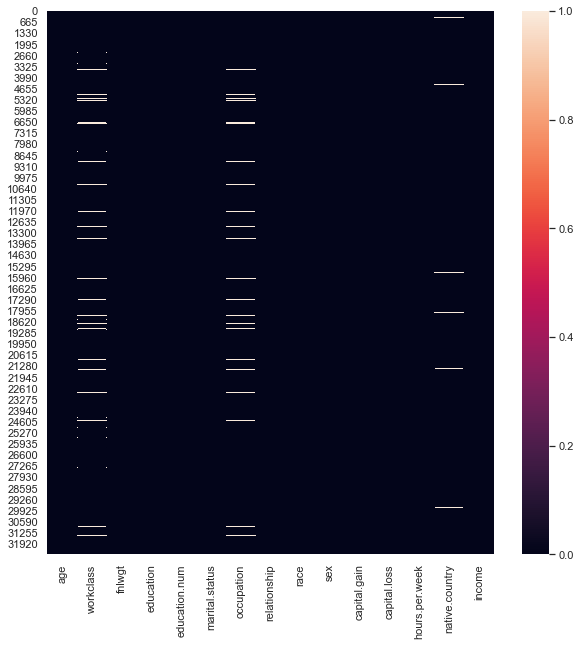

In [26]:
plt.figure(figsize = (10, 10))
sns.heatmap(data.isnull());

**Let's have some info about the data to know our options to deal with these Missing Values** 

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


**We can't drop columns that have missing values cz Missing Values aren't big enough comparing to the size of the dataset** 

**but since we are here dealing with categorical features we can drop the rows tho**

In [28]:
data.dropna(axis='index', how='any', inplace = True)
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

## <center> 2. Dropping Duplicated Rows

In [29]:
sum(data.duplicated())

23

In [30]:
data.drop_duplicates(inplace=True)

In [31]:
sum(data.duplicated())

0

## <center> Feature Selection

**From displaing the data seems there is a dependency between education & education.num**
**so we'll drop education so we don't have to do encoding to this feature**  

In [32]:
data.loc[: ,["education", "education.num"]]

,education,education.num
1,HS-grad,9
3,7th-8th,4
4,Some-college,10
5,HS-grad,9
6,10th,6
...,...,...
32556,Some-college,10
32557,Assoc-acdm,12
32558,HS-grad,9
32559,HS-grad,9


In [33]:
data.drop('education', axis=1, inplace=True)
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

**So before we do encoding to the categorical features we first need to do feature selection to the numerical feeatures 
so we need to encode the (Label column) with (label encoder) since it's a binary data not a nominal data**

In [34]:
data["income"].unique()

array(['<=50K', '>50K'], dtype=object)

In [35]:
data["income"].replace({"<=50K": 0,  ">50K": 1}, inplace = True )

In [36]:
data["income"]

1        0
3        0
4        0
5        0
6        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 30139, dtype: int64

**So here we will visualize the numerical features using (heatmap) to see if there is a (dependency) between features**

 **And the (correlation) between features and the target label**

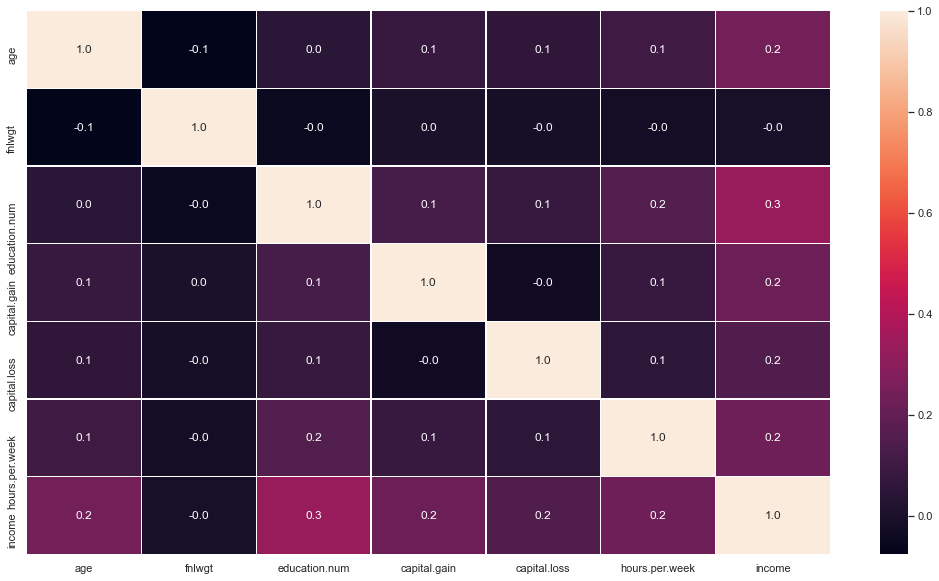

In [37]:
f,ax = plt.subplots(figsize=(18, 10))
sns.heatmap(pd.DataFrame(data).corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

**From the heat map we noticed that there is no dependency & there is no correlation between fnlwgt and the target label (income) will drop that feature (fnlwgt)**

In [38]:
data.drop('fnlwgt', axis=1, inplace=True)

## <center> Encoding Categorical Features

**To know the Categorical Features**

In [39]:
data.dtypes 

age                int64
workclass         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income             int64
dtype: object

In [40]:
categorical_features = ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

**First we need to know if these features are (nominal) data or (ordinal), so we will use this function** 

In [41]:
def get_uniques(df, columns):
    uniques = dict()
    for column in columns:
        uniques[column] = list(df[column].unique())
    return uniques

In [42]:
get_uniques(data, categorical_features)

{'workclass': ['Private',
  'State-gov',
  'Federal-gov',
  'Self-emp-not-inc',
  'Self-emp-inc',
  'Local-gov',
  'Without-pay'],
 'marital.status': ['Widowed',
  'Divorced',
  'Separated',
  'Never-married',
  'Married-civ-spouse',
  'Married-spouse-absent',
  'Married-AF-spouse'],
 'occupation': ['Exec-managerial',
  'Machine-op-inspct',
  'Prof-specialty',
  'Other-service',
  'Adm-clerical',
  'Transport-moving',
  'Sales',
  'Craft-repair',
  'Farming-fishing',
  'Tech-support',
  'Protective-serv',
  'Handlers-cleaners',
  'Armed-Forces',
  'Priv-house-serv'],
 'relationship': ['Not-in-family',
  'Unmarried',
  'Own-child',
  'Other-relative',
  'Husband',
  'Wife'],
 'race': ['White',
  'Black',
  'Asian-Pac-Islander',
  'Other',
  'Amer-Indian-Eskimo'],
 'sex': ['Female', 'Male'],
 'native.country': ['United-States',
  'Mexico',
  'Greece',
  'Vietnam',
  'China',
  'Taiwan',
  'India',
  'Philippines',
  'Trinadad&Tobago',
  'Canada',
  'South',
  'Holand-Netherlands',
  'Pue

**These Categorical Features are all nominal there is no order so that we will use (one hot encoder) except (Sex) it's binary like the target column so we will use for it label encoder**

In [43]:
binary_features = ['sex']

nominal_features = ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'native.country']

In [44]:
def binary_encode(df, columns):
    label_encoder = LabelEncoder()
    for column in columns:
        df[column] = label_encoder.fit_transform(df[column])
    return df

def onehot_encode(df, columns):
    for column in columns:
        dummies = pd.get_dummies(df[column])
        df = pd.concat([df, dummies], axis=1)
        df.drop(column, axis=1, inplace=True)
    return df

In [45]:
data = binary_encode(data, binary_features)
data = onehot_encode(data, nominal_features)

In [46]:
data.head(3)

,age,education.num,sex,capital.gain,capital.loss,hours.per.week,income,Federal-gov,Local-gov,Private,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
1,82,9,0,0,4356,18,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,54,4,0,0,3900,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,41,10,0,0,3900,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


**See if all features are numerical?**

In [47]:
(data.dtypes == 'object').sum()

0

In [48]:
y = data['income']
X = data.drop('income', axis=1)

## <center> Scaling

In [49]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [50]:
X

,age,education.num,sex,capital.gain,capital.loss,hours.per.week,Federal-gov,Local-gov,Private,Self-emp-inc,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,0.890411,0.533333,0.0,0.0,1.000000,0.173469,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.506849,0.200000,0.0,0.0,0.895317,0.397959,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.328767,0.600000,0.0,0.0,0.895317,0.397959,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.232877,0.533333,0.0,0.0,0.865473,0.448980,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.287671,0.333333,1.0,0.0,0.865473,0.397959,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30134,0.068493,0.600000,1.0,0.0,0.000000,0.397959,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30135,0.136986,0.733333,0.0,0.0,0.000000,0.377551,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30136,0.315068,0.533333,1.0,0.0,0.000000,0.397959,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30137,0.561644,0.533333,0.0,0.0,0.000000,0.397959,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## <center> Splitting

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)


## <center> Training

In [52]:
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC()
                            
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                   Logistic Regression trained.
                         Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.


## <center> Model Selection

In [53]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))

                   Logistic Regression: 83.99%
                         Decision Tree: 80.99%
Support Vector Machine (Linear Kernel): 84.34%
   Support Vector Machine (RBF Kernel): 83.00%


In [54]:
model = LinearSVC()

In [55]:
model.fit(X_train, y_train)

LinearSVC()

**So Support Vector Machine (Linear Kernel) is the best Model**

## <center> Evaluation

In [56]:
y_train_prediction = model.predict(X_train)

In [57]:
training_data_accuracy = accuracy_score(y_train, y_train_prediction)
print('Accuracy score of test data : {:.2f} %'.format(training_data_accuracy * 100))

Accuracy score of test data : 85.14 %


In [58]:
y_test_prediction = model.predict(X_test)

In [59]:
test_data_accuracy = accuracy_score(y_test, y_test_prediction)
print('Accuracy score of test data : {:.2f} %'.format(test_data_accuracy * 100))

Accuracy score of test data : 84.34 %


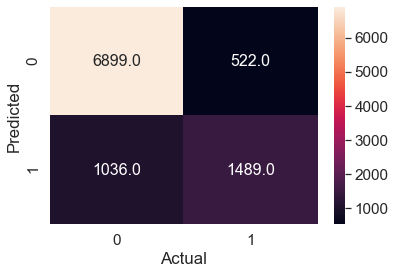

In [60]:
data_cn = (confusion_matrix(y_test, y_test_prediction))
sns.set(font_scale=1.4) # for label size
sns.heatmap(data_cn, annot=True, annot_kws={"size": 16}, fmt= '.1f')
ax = plt.axes()
ax.set(xlabel ="Actual", ylabel="Predicted");

In [61]:
print(classification_report(y_test, y_test_prediction,labels=[0, 
1]))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      7421
           1       0.74      0.59      0.66      2525

    accuracy                           0.84      9946
   macro avg       0.80      0.76      0.78      9946
weighted avg       0.84      0.84      0.84      9946



## <center> Sample of comparison between the predicted values and the actual values 

In [62]:
print(y_test[41:51])

29082    1
2421     1
19712    0
13682    0
29996    0
12457    0
10655    0
22568    0
25705    0
14757    0
Name: income, dtype: int64


In [63]:
print(y_test_prediction[41:51])


[1 1 0 0 0 0 0 0 0 0]
